In [80]:
import matplotlib.pyplot as plt 
import pandas as pd

In [81]:
data = pd.read_csv('../data/Chuvas/Chuvas21-25.csv')

In [82]:
top_cities = (
        data.loc[data["Mês/Ano"] == '04/2022', ["Posto", "Acumulado"]]
          .sort_values("Acumulado", ascending=False)
          .head(15)
          .reset_index(drop=True)
    )

top_cities

,Posto,Acumulado


In [83]:
data[['Posto', 'Mês/Ano', 'Acumulado']]

,Posto,Mês/Ano,Acumulado
0,Abreu e Lima,mai./2021,"8750,9"
1,Araçoiaba (Granja Cristo Redentor),mai./2021,"5855,1"
2,Cabo,mai./2021,0
3,Cabo (Barragem de Gurjaú),mai./2021,"9366,8"
4,Cabo (Barragem de Suape),mai./2021,"9539,9"
...,...,...,...
1387,Paulista,abr./2025,"8190,9"
1388,Recife (Alto da Brasileira),abr./2025,"8504,7"
1389,Recife (Codecipe / Santo Amaro),abr./2025,"8354,5"
1390,Recife (Várzea),abr./2025,"1410,2"


In [84]:

def plot_monthly_city_rainfall_gradient(
    df,
    month_year: str,
    top_n: int = 10,
    *,
    figsize: tuple = (10, 5),
    cmap_name: str = "viridis",
    tick_labelsize: int = 8,
    rotation: int = 45
) -> plt.Figure:
    """
    Exibe o TOP-N de cidades com maior chuva acumulada em um mês específico,
    usando gradiente de cor e labels de nome alinhados corretamente.
    
    Aceita df como pandas.DataFrame ou dict/list compatível com DataFrame.
    
    Parâmetros adicionais
    ---------------------
    tick_labelsize : int
        Tamanho da fonte dos nomes no eixo x.
    rotation : int
        Ângulo de rotação dos nomes no eixo x.
    """
    # Converte dict/list em DataFrame, se necessário
    if not isinstance(df, pd.DataFrame):
        df = pd.DataFrame(df)

    df = df.copy()
    df["Acumulado"] = pd.to_numeric(df["Acumulado"], errors="coerce")

    # Filtra pelo mês/ano desejado e ordena
    top_cities = (
        df.loc[df["Mês/Ano"] == month_year, ["Posto", "Acumulado"]]
          .sort_values("Acumulado", ascending=False)
          .head(top_n)
          .reset_index(drop=True)
    )

    # Configurações do estilo
    plt.style.use("dark_background")
    fig, ax = plt.subplots(figsize=figsize)
    fig.patch.set_facecolor("#222222")
    ax.set_facecolor("#222222")

    cmap = plt.get_cmap(cmap_name)
    norm = plt.Normalize(vmin=top_cities["Acumulado"].min(), vmax=top_cities["Acumulado"].max())
    colors = cmap(norm(top_cities["Acumulado"]))

    # Plota barras com gradiente
    bars = ax.bar(top_cities["Posto"], top_cities["Acumulado"], color=colors)
    ax.bar_label(
        bars,
        labels=[f"{v:.1f}" for v in top_cities["Acumulado"]],
        padding=3,
        color="white",
        fontsize=9
    )

    ax.set_title(f"Top {len(top_cities)} – Chuva acumulada • {month_year}",
                 color="white", fontsize=14)
    ax.set_xlabel("Cidade", color="white")
    ax.set_ylabel("Chuva (mm)", color="white")

    # Ajusta ticks com alinhamento correto
    plt.setp(
        ax.get_xticklabels(),
        rotation=rotation,
        ha="right",
        rotation_mode="anchor",
        fontsize=tick_labelsize,
        color="white"
    )
    ax.tick_params(axis="y", labelsize=10, colors="white")
    ax.grid(True, linestyle="--", linewidth=0.5, color="gray", alpha=0.7)

    plt.tight_layout()
    return fig




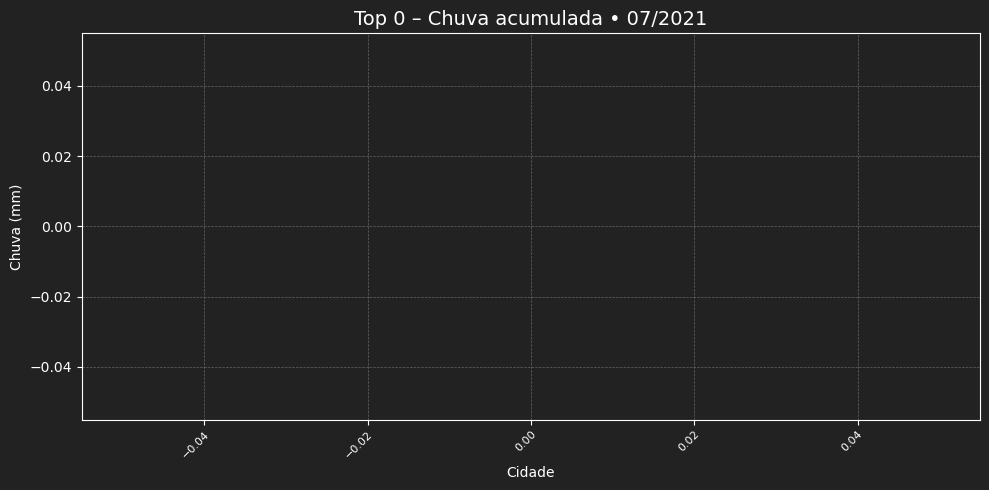

In [85]:
fig = plot_monthly_city_rainfall_gradient(data, "07/2021", top_n = 15)
plt.show()